In [1]:
import numpy as np
import matplotlib.pyplot as py
import pandas as pd
import seaborn as sb
from sklearn.svm import SVC

In [9]:
########################################### Analyse profondeur #######################################################


In [11]:
data=pd.read_excel("C:/Users/HP/Documents/dataset.xlsx")
data
#sb.scatterplot(data["SARS-Cov-2 exam result"],data["Coronavirus229E"],data=data)
 

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,ae66feb9e4dc3a0,3,positive,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5640,517c2834024f3ea,17,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5641,5c57d6037fe266d,4,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5642,c20c44766f28291,10,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

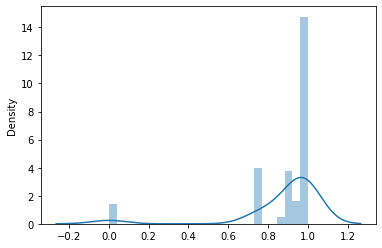

In [11]:
data
moy=data.isna().mean()
sb.distplot(moy)
#la courbe de densite nous montre la densité elevée pour d#es [0.6,1] ------>
#on a beaucoup plus de données manquantes dans notre jeu de données

In [12]:
#on crée les sous ensembles identifies lors d el'exploration des donn
moy=data.isna().mean()
#l'idéé cest de creer un sous ensemble de colonnes les plus pertinentes sur lesquelles nous allons travailler
#En ajoutant bien sur 'Patient age quantile','SARS-Cov-2 exam result' qui sont les features primaires

blood=list(data.columns[(moy<0.90) &(moy>0.88)])
virus=list(data.columns[(moy<0.80) &(moy>0.75)])
col=blood+virus+['Patient age quantile','SARS-Cov-2 exam result']
len(col)

#en gros on a gardé 33 colonnes celles qui sont les plus pertinentes





33

In [13]:
#on va ensuite filtrer le dataset en fonction des colonnes pertinentes
#pour cela on prendre le dataset et on lui passe comme argument la liste 
filtre=data[col]
filtre

,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),...,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Patient age quantile,SARS-Cov-2 exam result
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,negative
1,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,17,negative
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,negative
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,negative
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,15,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,positive
5640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,negative
5641,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,negative
5642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,negative


In [14]:
#on importe sklearn pour definir nos train_set et test_set
from sklearn.model_selection import train_test_split
#on va decouper le jeu de donnees en 2 categories train et test set
#il doit y avoir plus de train_set que de test_test
train,test= train_test_split(filtre,test_size=0.2,random_state=0)
test.shape

(1129, 33)

In [15]:
#verifions les 2 jeux de donnes avec notre target 
train['SARS-Cov-2 exam result'].value_counts()

negative    4068
positive     447
Name: SARS-Cov-2 exam result, dtype: int64

In [16]:
test['SARS-Cov-2 exam result'].value_counts()

negative    1018
positive     111
Name: SARS-Cov-2 exam result, dtype: int64

#on doit mtn identifier les variables qualitatives





In [17]:

data.select_dtypes("object")
  
#il est difficile de manipuler des variables categorielles donc nous allons faire de l'encodage 
#c'est à dire affecter aux groupes identifiés des valeurs numériques
#from sklearn.preprocessing import LabelEncoder
#= LabelEncoder()
 
#il faut supprimer la valeur avec la fonction delete de numpy qui pend comme argument la liste et lindice de lelement a sup

    


   
  

,Patient ID,SARS-Cov-2 exam result,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,...,Urine - Ketone Bodies,Urine - Nitrite,Urine - Urobilinogen,Urine - Protein,Urine - Leukocytes,Urine - Crystals,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color
0,44477f75e8169d2,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,negative,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,negative,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,ae66feb9e4dc3a0,positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5640,517c2834024f3ea,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5641,5c57d6037fe266d,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5642,c20c44766f28291,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,absent,NaN,normal,absent,29000,Ausentes,absent,absent,absent,yellow


## 


i
#1=detected et 0=not detected


In [18]:
from sklearn.preprocessing import LabelEncoder
label= LabelEncoder()
dico={"positive":1,"negative":0,"detected":1,"not detected":0 }

for i in filtre.select_dtypes("object"):
    
    filtre[i]=filtre[i].map(dico)

 

<ipython-input-18-b77da91ed38e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtre[i]=filtre[i].map(dico)


In [19]:
filtre.describe()
filtre.dtypes.value_counts()
#l'encodage a été bien éffectué car il n'y a plus de variable object dans notre filtre

float64    31
int64       2
dtype: int64

In [20]:
filtre.isna().mean()

Hematocrit                                          0.893161
Hemoglobin                                          0.893161
Platelets                                           0.893338
Mean platelet volume                                0.893870
Red blood Cells                                     0.893338
Lymphocytes                                         0.893338
Mean corpuscular hemoglobin concentration (MCHC)    0.893338
Leukocytes                                          0.893338
Basophils                                           0.893338
Mean corpuscular hemoglobin (MCH)                   0.893338
Eosinophils                                         0.893338
Mean corpuscular volume (MCV)                       0.893338
Monocytes                                           0.893515
Red blood cell distribution width (RDW)             0.893338
Respiratory Syncytial Virus                         0.990787
Influenza A                                         0.996811
Influenza B             

In [21]:
#fonction imputation pour supprimer les nan 
def impute(x):
    x=x.dropna(axis=0)
    return x      

In [22]:
def preprocess(a):
    
    dico={"positive":1,"negative":0,"detected":1,"not_detected":0 }
    a.drop("Adenovirus",axis=1)
    for i in a.select_dtypes("object"):
        a[i]=a[i].map(dico)

    
  
    X=a.drop("SARS-Cov-2 exam result",axis=1)
    Y=a["SARS-Cov-2 exam result"]
    print(Y.value_counts())
     
    return X,Y

In [23]:


#train["SARS-Cov-2 exam result"].value_counts()
#xtest,ytest=preprocess(test)
#xtrain,ytrain=preprocess(train)
#train["SARS-Cov-2 exam result"].value_counts()
xtrain,ytrain=preprocess(impute(train))
xtest,ytest=preprocess(impute(test))

0    258
1     38
Name: SARS-Cov-2 exam result, dtype: int64
0    54
1    12
Name: SARS-Cov-2 exam result, dtype: int64


<ipython-input-22-3a8b550ae7e4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a[i]=a[i].map(dico)
<ipython-input-22-3a8b550ae7e4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a[i]=a[i].map(dico)


In [24]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=0)
from sklearn.metrics import f1_score,confusion_matrix,classification_report

from sklearn.model_selection import learning_curve
def learning(model):
    model.fit(xtrain,ytrain)
    ypredict=model.predict(xtest)
    print("matrice de confusion")
    print([confusion_matrix(ytest,ypredict)])
    print("ypredicte",ypredict)
    print("ytest",ytest)
    print(" report:",classification_report(ytest,ypredict))
    n,train_score,val_score=learning_curve(model,xtrain,ytrain,cv=4,scoring="f1",train_sizes=np.linspace(0.1,1,10))
    py.plot(n,train_score.mean(axis=1))
    py.plot(n,val_score.mean(axis=1))
   
    return ypredict,n,train_score,val_score

matrice de confusion
[array([[51,  3],
       [ 8,  4]], dtype=int64)]
ypredicte [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
ytest 895     0
4762    0
3378    0
1180    0
2658    0
       ..
4314    0
552     0
5223    1
1281    0
4410    0
Name: SARS-Cov-2 exam result, Length: 66, dtype: int64
 report:               precision    recall  f1-score   support

           0       0.86      0.94      0.90        54
           1       0.57      0.33      0.42        12

    accuracy                           0.83        66
   macro avg       0.72      0.64      0.66        66
weighted avg       0.81      0.83      0.82        66



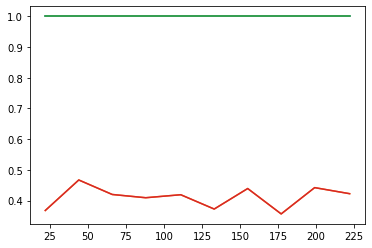

In [25]:
y,n,train_score,val_score=learning(model)
n
py.plot(n,train_score.mean(axis=1))
py.plot(n,val_score.mean(axis=1))

In [154]:
#vraiment les performances sont médiocres donc il faudra tester un autre algorithme
 

In [82]:
svm=SVC()
ysvm,nsvm,train_scoresvm,val_scoresvm=learning(svm)

    
 
     

         

matrice de confusion
[array([[54,  0],
       [12,  0]], dtype=int64)]
 report:               precision    recall  f1-score   support

           0       0.82      1.00      0.90        54
           1       0.00      0.00      0.00        12

    accuracy                           0.82        66
   macro avg       0.41      0.50      0.45        66
weighted avg       0.67      0.82      0.74        66



c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
 modele=KNeighborsClassifier()

In [30]:
modele.fit(xtrain,ytrain) 


KNeighborsClassifier()

In [31]:
 y=modele.predict(xtest)

In [32]:
modele.score(xtest,y)

1.0

matrice de confusion
[array([[54,  0],
       [ 8,  4]], dtype=int64)]
ypredicte [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
ytest 895     0
4762    0
3378    0
1180    0
2658    0
       ..
4314    0
552     0
5223    1
1281    0
4410    0
Name: SARS-Cov-2 exam result, Length: 66, dtype: int64
 report:               precision    recall  f1-score   support

           0       0.87      1.00      0.93        54
           1       1.00      0.33      0.50        12

    accuracy                           0.88        66
   macro avg       0.94      0.67      0.72        66
weighted avg       0.89      0.88      0.85        66



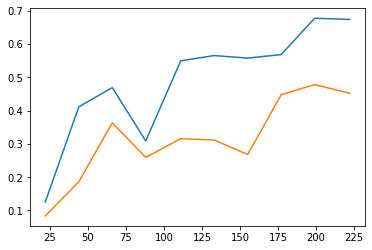

In [33]:
y,n,train_score,val_score=learning(modele)

In [2161]:
 modele.coef_

array([ 6.41484640e-01, -5.63933869e-01, -1.81115454e-02,  9.59889108e-03,
       -1.07778390e-01, -8.37897072e-03,  6.12049904e-01, -1.13946793e-01,
       -3.63555616e-02, -1.05292594e+00, -6.50534572e-02,  8.45060260e-01,
        3.68523051e-02, -1.61299891e-03, -4.54387708e-02, -7.40293325e-02,
       -3.02316166e-01,  2.84494650e-16, -1.98389453e-01, -1.18637611e-01,
       -2.23364172e-01, -1.50846790e-01, -5.55111512e-16,  5.55439619e-02,
        1.77800806e-01, -1.61061997e-01, -3.70862669e-01, -2.90288330e-01,
        0.00000000e+00, -2.09513614e-01,  0.00000000e+00,  8.41241204e-03])

In [26]:
from sklearn.metrics import f1_score,confusion_matrix,classification_report

print([confusion_matrix(ytest,y)])
print(" report",classification_report(ytest,y))


[array([[51,  3],
       [ 8,  4]], dtype=int64)]
 report               precision    recall  f1-score   support

           0       0.86      0.94      0.90        54
           1       0.57      0.33      0.42        12

    accuracy                           0.83        66
   macro avg       0.72      0.64      0.66        66
weighted avg       0.81      0.83      0.82        66



In [35]:
#py.plot(n,train_score.mean(axis=1))
#py.plot(n,val_score.mean(axis=1))

In [36]:
# KNeighborsClassifier est le meilleur model d'après la courbe d'apprentissage